In [318]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from IPython import display
import seaborn as sns
import csv
from statistics import mean

In [319]:
df = pd.read_csv('startup.csv')

In [320]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


In [321]:
df_dropped = df.dropna()

In [322]:
df_dropped.tail()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
13708,Zyngenia,Technology,25.000000,operating,USA,MD,Gaithersburg,1.0,New Enterprise Associates:25000000,1.0,-,-,-,-,-,-,-,Montgomery,2008,40.664274:-73.9385
13709,ZYOMYX,Technology,34.275015,operating,USA,MO,Fremont,4.0,Bill & Melinda Gates Foundation:12000000|Mylan...,3.0,-,-,-,-,-,-,-,Carter,1998,36.227712:-115.264045
13710,Zype,Software,3.300000,operating,USA,NY,New York,2.0,Entrepreneurs Investment Fund:1600000|Revel Pa...,10.0,-,-,-,-,-,-,-,New York,2013,37.727239:-123.032229
13711,Whisk (formerly Zypsee),Sports,2.150000,operating,USA,NY,New York,2.0,ff Venture Capital:2150000,1.0,-,-,-,-,-,-,-,New York,2011,47.620499:-122.350876
13712,Ôasys,Hardware,0.018192,operating,USA,CA,San Francisco,1.0,Startupbootcamp:18192,1.0,-,-,-,-,-,-,-,San Francisco,2014,34.019394:-118.410825


In [323]:
df_dropped['founded_at'].unique()

array(['2011', '2008', '2014', '2000', '2013', '2012', '2007', '2010',
       '1990', '2002', '2001', '2009', '2006', '1999', '1998', '2004',
       '2015', '2005', '1986', '2003', '1971', '1989', '1997', '1979',
       '1993', '1987', '1961', '1996', '1947', '1994', '1992', '1984',
       '1995', '1949', '1985', '1974', '1969', '1975', '1918', '1980',
       '1944', '1972', '1983', '1982', '1976', '1988', '1991', '1977',
       '26-Feb', '1973', '1981', '1917', 'Feb-31', '1-Jan', '1970',
       '1906', '1978', '19-Jul', '1958', '1966', '1953', '1952', '1956',
       '1908', '1962', '1945', '1967', '1909', '1954', '1968', '1965',
       '1928', '1963', '18-Sep', '24-Aug', '1920', '1925', '1930', '1926',
       '1919', '1924', '1951', '29-Apr', '1923', '1914', '1929', '1902',
       '1939', '1912', '1911', '1933', '1950'], dtype=object)

## Question1: what is the funding_total_usd for 2011? USD in K

In [324]:
df_dropped[df_dropped['founded_at']=='2011']['funding_total_usd']

0        33.600000
1         1.150050
9         0.794000
13        3.400000
20        0.500000
           ...    
13661    35.600000
13665    45.500000
13681     4.220018
13690     0.080000
13711     2.150000
Name: funding_total_usd, Length: 1532, dtype: float64

In [325]:
# total funding for 2011
df_dropped[df_dropped['founded_at']=='2011']['funding_total_usd'].sum()

24591.242369436

In [326]:
df_dropped['founded_at'].sort_values()

8528      1-Jan
12530     1-Jan
12534     1-Jan
12536     1-Jan
12529     1-Jan
          ...  
8318     24-Aug
916      26-Feb
10168    29-Apr
1330     Feb-31
2129     Feb-31
Name: founded_at, Length: 13712, dtype: object

In [327]:
list(df_dropped['founded_at'].sort_values().unique())

['1-Jan',
 '18-Sep',
 '19-Jul',
 '1902',
 '1906',
 '1908',
 '1909',
 '1911',
 '1912',
 '1914',
 '1917',
 '1918',
 '1919',
 '1920',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1929',
 '1930',
 '1933',
 '1939',
 '1944',
 '1945',
 '1947',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1956',
 '1958',
 '1961',
 '1962',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '24-Aug',
 '26-Feb',
 '29-Apr',
 'Feb-31']

In [328]:
df_dropped['founded_at'].value_counts()

2012    1657
2011    1532
2013    1511
2010    1157
2014     943
        ... 
1953       1
1925       1
1945       1
1939       1
1909       1
Name: founded_at, Length: 92, dtype: int64

In [329]:
df_dropped[df_dropped['founded_at'] == '2011']['funding_total_usd'].sum()

24591.242369436

## Question2: what is the funding_total_usd for all available years?

In [330]:
ls = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls.append(df_dropped[df_dropped['founded_at'] == i]['funding_total_usd'].sum())

print(ls)
    

[987.853094, 250.0, 9.0, 20.0, 16.0, 16.5, 245.0, 19.33, 2.0, 18.0, 300.0, 0.157, 120.0, 2.5, 1.75, 81.35, 0.15432, 16.600216, 1000.0, 59.929933, 25.65, 0.150768, 7.5, 5.0, 7.4, 10.0, 2.0, 28.5, 6.0, 96.30000000000001, 17600.0, 331.0, 60.0, 19.6, 23.5, 6.0, 207.259114, 25.0, 10.0, 90.8, 4.67321, 38.65, 13.378196, 3591.0, 21.36, 57.0726, 52.0, 0.75, 506.2, 334.096, 97.41040000000001, 489.73600000000005, 1109.7, 203.2, 402.561365, 30826.27123, 969.485851, 1235.964973, 430.713798, 716.3299959999999, 296.064354, 1181.0722830000002, 792.1911379999999, 1247.632421, 1073.55674, 1374.605991, 2250.795642, 3907.8827180000003, 4378.504615, 7232.24658342, 9221.717702399, 21293.925880151, 15731.084839000001, 16978.641015884, 18256.383254, 23352.259765249997, 27726.36569675, 24054.835289000002, 27880.752675999996, 34298.53740258, 27645.401071570002, 33681.691192, 21523.016813984003, 24591.242369436, 19868.646866529, 15863.696440848998, 4790.459357878, 672.336355021, 5.5, 1.0, 26.72, 18.5]


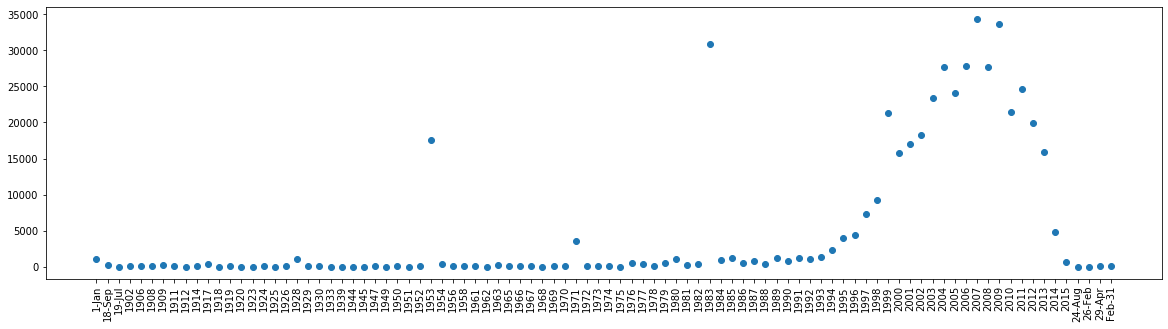

In [331]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls,'o')

In [332]:
print(df_dropped[df_dropped['founded_at'] == '2009']['funding_total_usd'].sum())

33681.691192


In [333]:
print(df_dropped[df_dropped['founded_at'] == '2007']['funding_total_usd'].sum())

34298.53740258


In [334]:
print(df_dropped[(df_dropped['founded_at'] == '1953')]['funding_total_usd'].sum())

17600.0


In [335]:
print(df_dropped[df_dropped['founded_at'] == '1953']['category_list'])

4584    Hardware
Name: category_list, dtype: object


## Question 3: Answer Question 2 for Software Category

In [336]:
ls_software = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls_software.append(df_dropped[(df_dropped['founded_at'] == i) & (df_dropped['category_list'] == 'Software')]['funding_total_usd'].sum())

print(ls_software)


[68.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 11.4, 0.0, 0.0, 0.0, 0.0, 0.5, 6.0, 0.0, 0.0, 10.0, 0.0, 4.5, 25.0, 0.0, 13.0, 0.0, 2.5726, 12.0, 0.75, 330.2, 0.0, 0.0, 288.3, 1030.5, 104.0, 346.0, 30127.201999999997, 200.26204800000002, 101.729971, 236.38709300000002, 66.680511, 114.068238, 246.649674, 190.7, 344.546725, 157.02749999999997, 123.93339999999999, 284.2, 722.272222, 1218.3065430000001, 1403.4045914199999, 2995.954001399, 6851.748235581001, 5274.368905, 3170.162111884, 3520.6371440000003, 9759.921296249999, 8078.887584, 6230.730723000001, 6664.218580000001, 8051.633184, 8089.574015, 9883.793102, 6659.123789, 8531.500703976, 8183.62137026, 4727.556383104, 1324.721404466, 159.1, 0.0, 0.0, 0.0, 0.0]


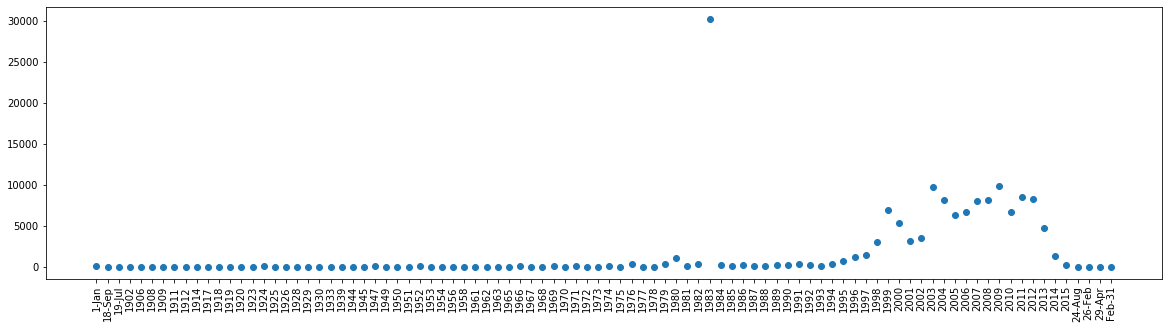

In [337]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls_software,'o')

# Question 4: Answer Question 3 for Hardware Category

In [338]:
ls_Hardware = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls_Hardware.append(df_dropped[(df_dropped['founded_at'] == i) & (df_dropped['category_list'] == 'Hardware')]['funding_total_usd'].sum())

print(ls_Hardware)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17600.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.5, 50.4104, 0.0, 0.0, 5.5, 10.06, 0.0, 350.0, 0.0, 14.92, 48.811481, 2.7295, 0.0, 45.78, 17.22, 22.0, 0.0, 437.20918, 81.4, 308.66513399999997, 1955.67384, 220.60000000000002, 1652.3684250000001, 1248.752311, 1807.473634, 1037.860842, 934.2154760000001, 726.15455, 799.081749, 1376.7903700000002, 97.20136600000001, 269.334527, 387.829661, 337.83883000000003, 462.01051700000005, 365.31274700000006, 263.08059199999997, 105.07751700000001, 0.15369300000000002, 0.0, 0.0, 0.0, 0.0]


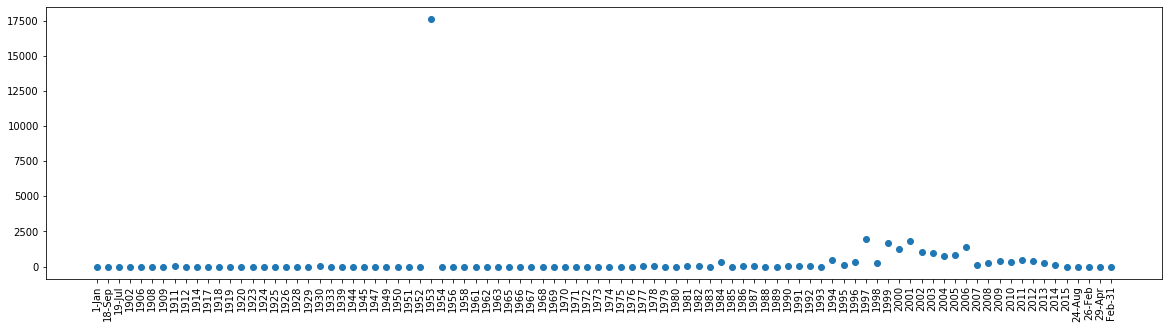

In [339]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls_Hardware,'o')


# Regardless of the year, how much fund does exist for Automation, Business, ...? 

In [340]:
df_dropped.groupby('category_list')['funding_total_usd'].sum()

category_list
Automation            559.024294
Business             1422.426471
Communication        4052.314321
Construction          416.866774
Education           11273.229054
Employment            120.340000
Entertainment        8277.877143
Entrepreneur            1.545000
Finance             29572.705186
Gadget                  7.500000
Games                4853.158856
Hardware            33107.846342
Health              24640.058284
Industrial             44.305000
Management           3273.054044
Manufacturing       29928.799992
Marketing           27710.328309
Mobile              10129.438422
Pharmaceuticals      1237.935911
Services            26759.153986
Software           145997.345649
Sports               2070.726740
Style                 244.720695
Technology          86163.164572
Travel                327.289249
food                 1854.450244
Name: funding_total_usd, dtype: float64

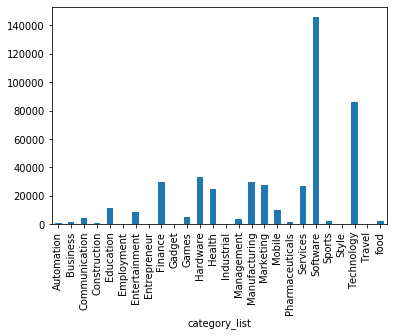

In [341]:
df_dropped.groupby('category_list')['funding_total_usd'].sum().plot(kind='bar')

In [342]:
print(sum(ls_software))

145997.34564934


# Question 5: What % of startups are software or Technology?

In [343]:
sample = df_dropped['category_list'].value_counts()


In [344]:
total = df_dropped['category_list'].value_counts().sum()
total

13712

In [345]:
c = df_dropped['category_list'].value_counts()

d = df_dropped['category_list'].value_counts().sum()

In [346]:
def percentage (d, c):
    return ((c/d)*100)
for each in c:
    pc = percentage(d, each)
    print (pc)

34.80892648774796
11.231038506417736
7.934655775962661
7.825262543757293
7.460618436406068
5.870770128354725
4.769544924154025
3.7995915985997666
3.6245624270711785
3.478704784130689
2.72024504084014
1.76487747957993
0.8751458576429404
0.7876312718786465
0.7876312718786465
0.5907234539089848
0.47403733955659283
0.41569428238039674
0.26983663943990666
0.13127187864644108
0.13127187864644108
0.09480746791131855
0.08022170361726955
0.03646441073512252
0.029171528588098013
0.007292882147024503


# software funding in San Francisco

In [347]:
san_francisco = df_dropped.query('city == "San Francisco"')
san_francisco.head()
san_francisco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 1 to 13712
Data columns (total 20 columns):
name                   1877 non-null object
category_list          1877 non-null object
funding_total_usd      1877 non-null float64
status                 1877 non-null object
country_code           1877 non-null object
state_code             1877 non-null object
city                   1877 non-null object
funding_rounds         1877 non-null float64
Investors              1877 non-null object
Number_of_Investors    1877 non-null float64
Acquirer               1877 non-null object
Acquirer_Category      1877 non-null object
Acquirer_Country       1877 non-null object
Acquirer_State         1877 non-null object
Acquirer_City          1877 non-null object
Acquired_Price         1877 non-null object
Acquired Currency      1877 non-null object
county                 1877 non-null object
founded_at             1877 non-null object
Coordinates            1877 non-null object
dtypes: f

In [348]:
sf_software = []
for i in list(san_francisco['founded_at'].sort_values().unique()):
    sf_software.append(san_francisco[(san_francisco['founded_at'] == i) & (san_francisco['category_list'] == 'Software')]['funding_total_usd'].sum())

print(sf_software)

[0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 5.0, 37.5, 7.0, 43.0, 3.4361853989999998, 584.6207999999999, 240.30255899999997, 131.1009, 181.33729399999999, 100.94809322, 796.287073, 899.088386, 1117.705074, 3054.856993, 1988.7159819999997, 3636.8924210000005, 1339.965797, 1793.144333, 2113.9449922599997, 1629.572455, 240.575874466, 18.400000000000002]


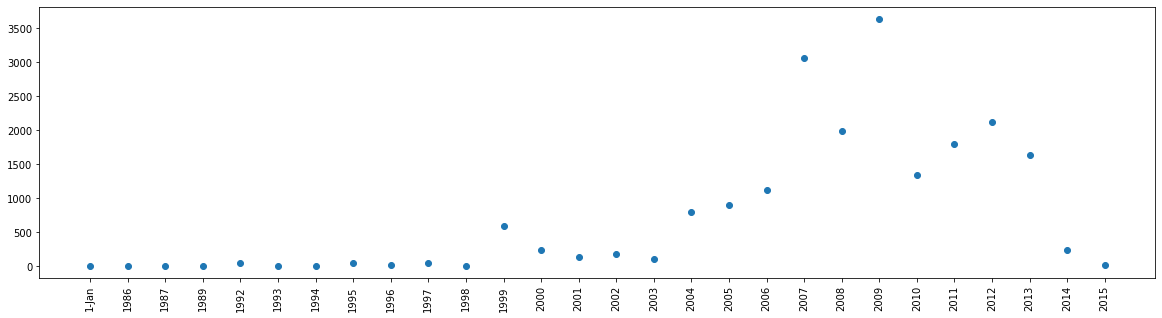

In [349]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(san_francisco['founded_at'].sort_values().unique()), sf_software,'o')

# Pearson correlation between the number of investers and the funding total
Null hypothesis: number of investers are not correlated with funding total.

In [350]:
X = df_dropped.Number_of_Investors.values
Y = df_dropped.funding_total_usd.values

In [351]:
def pearson_r(X, Y):
    corr_mat=np.corrcoef(X,Y)
    return corr_mat[0,1]
r_obs = pearson_r(X,Y)
print('Observed significance value=',r_obs)

Observed significance value= 0.08024147738834027


# Statistical analysis of total funding in software category.

In [352]:
software_funding = df_dropped.query('category_list == "Software"')

In [353]:
mean = np.mean(software_funding.funding_total_usd)
print(mean)

30.588172145262952


In [354]:
std_dev = np.std(software_funding.funding_total_usd)
print(std_dev)

448.57335577518586


In [355]:
mode = stats.mode(software_funding.funding_total_usd)
print(mode)

ModeResult(mode=array([2.]), count=array([89]))


In [356]:
median = statistics.median(software_funding.funding_total_usd)
print(median)

6.052753


In [357]:
software_funding.funding_total_usd.describe()

count     4773.000000
mean        30.588172
std        448.620354
min          0.010000
25%          1.450000
50%          6.052753
75%         21.700000
max      30079.503000
Name: funding_total_usd, dtype: float64

# Analysis of the number of investors in startups

(array([2.069e+03, 6.180e+02, 5.150e+02, 3.470e+02, 2.790e+02, 2.110e+02,
        2.690e+02, 1.040e+02, 6.400e+01, 5.400e+01, 5.400e+01, 3.300e+01,
        4.700e+01, 1.900e+01, 1.600e+01, 1.600e+01, 8.000e+00, 1.000e+01,
        1.200e+01, 5.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.16666667,  3.33333333,  4.5       ,  5.66666667,
         6.83333333,  8.        ,  9.16666667, 10.33333333, 11.5       ,
        12.66666667, 13.83333333, 15.        , 16.16666667, 17.33333333,
        18.5       , 19.66666667, 20.83333333, 22.        , 23.16666667,
        24.33333333, 25.5       , 26.66666667, 27.83333333, 29.        ,
        30.16666667, 31.33333333, 32.5       , 33.66666667, 34.83333333,
        36.        , 37.16666667, 38.33333333, 39.5       , 40.66666667,
        41.83333333, 43.        ]),
 <a lis

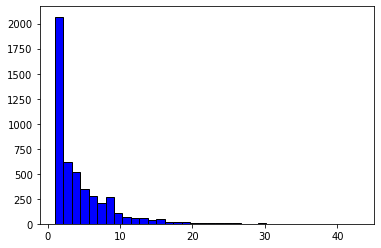

In [358]:
# matplotlib histogram
plt.hist(software_funding['Number_of_Investors'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

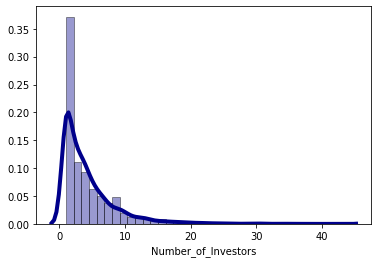

In [359]:
# Density Plot and Histogram of all arrival delays
sns.distplot(software_funding['Number_of_Investors'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Showing the correlation between number_of_investors and funding_rounds.

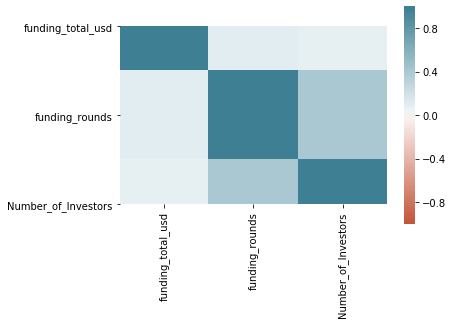

In [360]:
corr = df_dropped.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
)    
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

# Making an ECDF

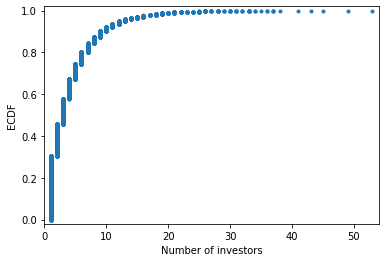

In [361]:
x = np.sort(df_dropped['Number_of_Investors'])
y = np.arange(1, len(x)+1) /len(x)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('Number of investors')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [362]:
# Summary

# After years of growth since 2007, investment has continued to underperform.
# In 1983, massive funding was made in software industry.

# From 2010 to 2013, investment was declined significantly.
# In Hardware field, a biggest investment was made only in 1953. This might be due to the fact that IBM effectively created the computer market in 1953 with the IBM 650.

# For data format (Month-Date) in founded date, these data may belongs to recent years based on its low funding total in overall trend. 

# Over 35% startups got 1~2 investors, and funding round and number of investors showed a mild correlation.

